In [1]:
import numpy as np

In [28]:
def SOR_Solver(phi, omega, max_iter, tol):
  nx, ny = phi.shape
  for it in range(max_iter):
    phi_old = phi.copy()
    for i in range(1, nx-1):
      for j in range(1,ny-1):
        phi[i,j] = (1-omega)*phi_old[i,j] + (omega/4)*(phi[i+1, j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])
    error = np.linalg.norm(phi-phi_old, ord = np.inf)
    if error < tol:
      print(f"Converged in {it + 1} iterations.")
      break
  return phi

In [29]:
def compute_velocity_field(phi,h):
  u= np.zeros_like(phi)
  v = np.zeros_like(phi)
  u[1:-1, 1:-1] = (phi[1:-1, 2:] - phi[1:-1, :-2])/(2*h)
  v[1:-1, 1:-1] = (phi[2:, 1:-1] - phi[:-2, 1:-1])/(2*h)
  return u,v

In [40]:
def compute_stream_function(u,v,h):
  nx, ny = u.shape
  psi = np.zeros((nx,ny))
  for i in range(1, nx):
    for j in range(1,ny):
      psi[1,j] = psi[i-1,j] + v[i,j]*h
  return psi

In [31]:
#parameters

Lx, Ly = 1.0, 1.0 #domain size
nx, ny = 51, 51 #number of grid points
h = Lx/(nx-1) #Grid spacing
omega = 1.5 #Relaxation factor
max_iter = 1000 #max num of iteration
tol= 1e-6 #Tolerane for convergence


In [32]:
#initial_potential_field
phi = np.zeros((nx,ny))

In [33]:
#boundary comnditions (example)
phi[:,0] = 1.0 #left boundary
phi[:,-1] = 1.0 #right boundary
phi[0,:] = 0.0 #bottom boundary
phi[-1,:] = 0.0 #top boundary

In [34]:
#solve for potential using SOR
phi = SOR_Solver(phi, omega, max_iter, tol)

In [35]:
#compute velocity field

u, v = compute_velocity_field(phi,h)

In [41]:
#compute stream function

psi =compute_stream_function(u,v,h)

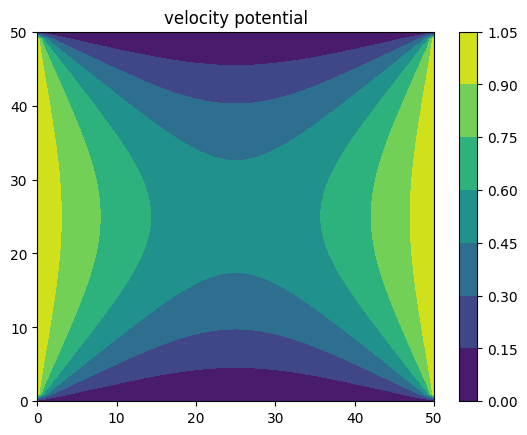

In [42]:
#print or visualize

import matplotlib.pyplot as plt
plt.contourf(phi)
plt.title('velocity potential')
plt.colorbar()
plt.show()

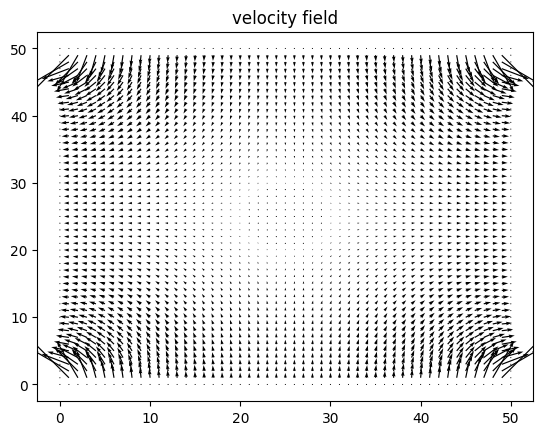

In [43]:
plt.quiver(u,v)
plt.title('velocity field')
plt.show()

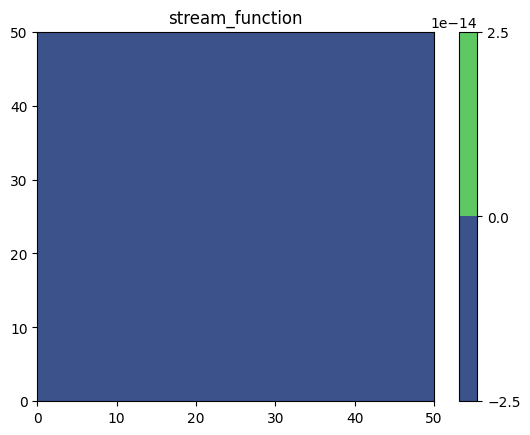

In [44]:
plt.contourf(psi)
plt.title('stream_function')
plt.colorbar()
plt.show()